Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

Переменная, которую надо предсказать - ’MEDV’.

Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import io
from matplotlib import pyplot as plt

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**crim**
per capita crime rate by town.

**zn**
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**
proportion of non-retail business acres per town.

**chas**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**
nitrogen oxides concentration (parts per 10 million).

**rm**
average number of rooms per dwelling.

**age**
proportion of owner-occupied units built prior to 1940.

**dis**
weighted mean of distances to five Boston employment centres.

**rad**
index of accessibility to radial highways.

**tax**
full-value property-tax rate per \$10,000.

**ptratio**
pupil-teacher ratio by town.

**black**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat**
lower status of the population (percent).

**medv**
median value of owner-occupied homes in \$1000s.

снача построю модель без анализа данных

In [20]:
# подключаю инструменты для создание модели линейной регрессии и разделения данных на тестовые и ренировочные

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
# выделяю признак для предсказания отдельно 

target = data[['MEDV']]
all_data = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [5]:
# разделеил данные на тренировочные и тестовые (в пропорции 80/20)

X_train, X_test, y_train, y_test = train_test_split(
    all_data,
    target,
    test_size = 0.2,
    random_state = 42
)

In [6]:
# обучил модель линейной регрессии

model = LinearRegression().fit(X_train, y_train)

In [7]:
# посчитал ошибку модели

model.score(X_test, y_test)

0.6687594935356298

- качество модели без предобработки данных составляет 0,66

Теперь посмотрим на данне и почистим мх

In [63]:
# проверяем на отсутствующие значения

data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- отсутствующих значений нет. Ничего заполнять не надо

In [18]:
# смотрим основные статистические данные признаков

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- думаю бесполезные столбцы ZN, CHAS

In [8]:
# удаляю из данных 

data = data.drop(['ZN', 'CHAS'], axis=1)

- то что необходимо проверить на выбросы CRIM, B

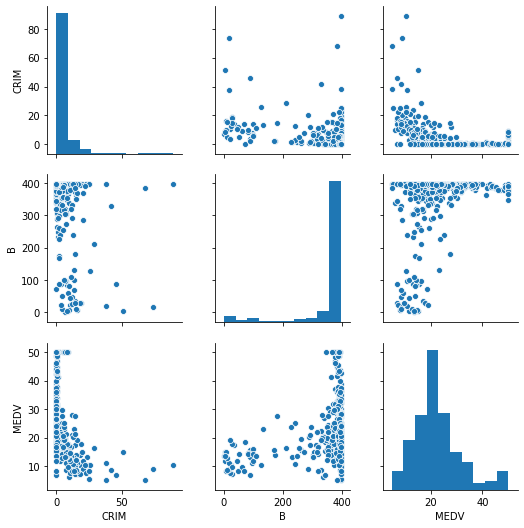

In [88]:
sns.pairplot(data[['CRIM', 'B', 'MEDV']])

In [11]:
# CRIM при среднем 3,6 разброс мин макс кажется странным, удаляю три выброса

data = data[data['CRIM'] < 60]

In [19]:
# низких значений по признаку В очень много, ничего не удаляю

data[data['B'] < 300]

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
18,0.80271,8.14,0.538,5.456,36.6,3.7965,4,307.0,21.0,288.99,11.69,20.2
32,1.38799,8.14,0.538,5.950,82.0,3.9900,4,307.0,21.0,232.60,27.71,13.2
34,1.61282,8.14,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5
102,0.22876,8.56,0.520,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63,18.6
134,0.97617,21.89,0.624,5.757,98.4,2.3460,4,437.0,21.2,262.76,17.31,15.6
145,2.37934,19.58,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
146,2.15505,19.58,0.871,5.628,100.0,1.5166,5,403.0,14.7,169.27,16.65,15.6
153,2.14918,19.58,0.871,5.709,98.5,1.6232,5,403.0,14.7,261.95,15.79,19.4
155,3.53501,19.58,0.871,6.152,82.6,1.7455,5,403.0,14.7,88.01,15.02,15.6
156,2.44668,19.58,0.871,5.272,94.0,1.7364,5,403.0,14.7,88.63,16.14,13.1


In [21]:
# создаю медель на обновленных данных

target = data[['MEDV']]
all_data = data[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    all_data,
    target,
    test_size = 0.2,
    random_state = 42
)

In [23]:
model_2 = LinearRegression().fit(X_train, y_train)

In [25]:
model_2.score(X_test, y_test)

0.776268029225285

- после обработки данных модель показывает результат лучше

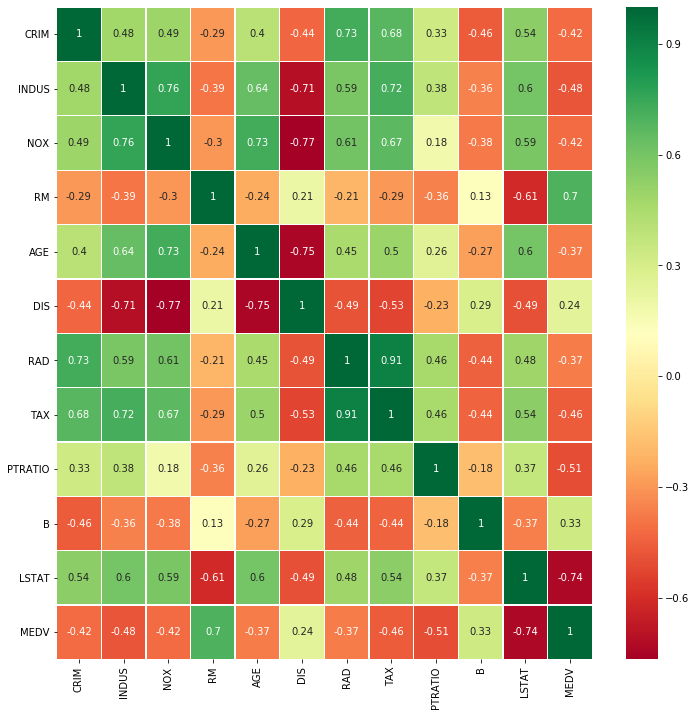

In [29]:
# посмотрим корреляцию признаков

sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(12,12)

In [37]:
# удалил признаки коррелирующие с таргетом менее 0,4

data_2 = data.drop(['AGE', 'DIS', 'RAD', 'B'], axis=1)

In [38]:
# построил модель на обновленных данных

target = data[['MEDV']]
all_data = data[['CRIM', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    all_data,
    target,
    test_size = 0.2,
    random_state = 42
)

In [40]:
model_3 = LinearRegression().fit(X_train, y_train)

In [41]:
model_3.score(X_test, y_test)

0.7470531711000841

- модель показала результат хуже чем во втором варианте